# <span style="color:blue"> Solutions </span> Lab 2 - Intro to Curve Fitting and Plotting 

##  The Photoelectric Effect and Projectile Motion
------------------------------------------------------------------------------------------------

### GitHub:

* Fork the Lab repository to your personal GitHub page.
* Sign into GitHub desktop (using options in the gearwheel) - open the Git Bash shell
* Clone/download the repository to your own directory
* Make a new branch, call it Version-0, this is where you will do your work - I am just learning how important this is!!!
* Save your work to the local machine regularly.
* Commit your work on this branch to GitHub regularly - you don't have to wait until the end of class.
* Remember to make additional branches (Version-1 and Version-2) following each pull request (see below).

### Grading: 
Recall we will be doing the cyclic grading cycle for this assignment.  See the complete syllabus - posted on Moodle - some detailed notes on grading and correcting your work.

Do your work in this file, so it is easy for me to find/grade.  However, there are good reasons to use multiple files in traditional coding projects, so if you have a good reason to want to make a new file, please talk to me about how to make that work.

#### Version-0: 
Before you leave lab today, commit your changes to GitHub, and open a pull request, comparing your forked Version-0 branch back to my original repository.  That's all.

#### Version-1: 
By Monday 9:15am, clean up any unfinished details.  
   * Every code should be well documented with comments.
   * Every graph should be well labeled.  If there is more than one data set or curve, add a legend.
   * Describe each graph with a short paragraph.  What is data plotted, why is it interesting, what model fits that data, is this the model you expect?  Give a written scientific description in complete sentences.
   * Open a pull request on GitHub comparing your forked Version-1 branch back to my original repository.

#### Version-2*: 
After class on Monday, I will post my solution.  
   * Compare our solutions, and look for places you could improve your work 
     * Are your calculations correct?
     * Did you understand (and describe) the physics correctly? 
     * Did you forget anything?
   * Make improvements and comments about your changes.  

\*I called this the Final Version in the syllabus.   

In [1]:
#how to load in plotting to a Jupyter Notebook
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
#A note on functions and array arithmetic - 
#several of you have noticed problems using the math module functions on numpy arrays.
#To avoid this problem, use the numpy versions of the functions.  
#For example:
import math
x=math.pi
print(math.sin(x))  #works great - notice what you get - what should you get ? (this is a preview for Ch 4)

x_array = math.pi*np.ones(4) #works fine
print(x_array)                #works fine
#print(math.sin(x_array))     #error
print(np.sin(x_array))        #works fine

1.2246467991473532e-16
[ 3.14159265  3.14159265  3.14159265  3.14159265]
[  1.22464680e-16   1.22464680e-16   1.22464680e-16   1.22464680e-16]


## Part 1: Fitting Millikan's Data w/ Least Squares Method 

Discuss your algorithm with your lab partner.  Since you'll be writing your own code today, you are welcome to disagree on the details.  On your own computer, code it up, following my suggestions from the pre-lab.  As you produce results, use markdown cells to present and describe your work.  *For example add a markdown cell to: describe the plotted data, comment on how good the fit appears, and how it relates to Einstein's model, the percent difference, etc.*

### Your solution to Part 1:
------------------------------------------------------------------------------------------------------------------

Fit Coefficients:
----------------------
m= 4.08822735852e-15
b= -1.73123580398
----------------------
Plancks constant is measured as:  6.54116377363e-34
The percent difference with the accepted value is: 1.281%
The work function phi = -1.73123580398


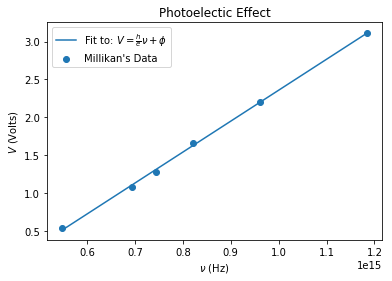

In [4]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

Verbose=False

def least_squares_fit(x,y):
    
    #initialize to zero - good programming habit not taught in Newman
    E_x = 0
    E_y = 0
    E_xx = 0
    E_xy = 0
    
    #run the the x and y arrays simultaneously using a pythonic trick
    for x_i, y_i in zip(x,y):
        
        if Verbose == True:
            print("xi,yi: ", x_i,y_i)
        
        #add the next term in the sum (quantities in Newman + PreLab)
        E_x += x_i
        E_y += y_i
        E_xx += x_i*x_i
        E_xy += x_i*y_i

    #we have to normalize these - x.size is the length of the array    
    N = x.size
    E_x /= N
    E_y /= N
    E_xx /= N
    E_xy /= N
        
    if Verbose == True:
        print("E values",E_x,E_y,E_xx,E_xy)
        
    #calculate our linear fit coefficients
    m = (E_xy - E_x*E_y)/(E_xx - E_x**2)
    b = (E_xx*E_y - E_x*E_xy)/(E_xx - E_x**2)
    
    return m,b

#data loading as in Newman     
data = np.loadtxt("millikan.txt",float)
nu = data[:,0] #first column - in Hertz
V  = data[:,1] #second column - in Volts

#fit model V=h/e nu + phi, so m=h/e and b=phi
m,b = least_squares_fit(nu,V)
print("Fit Coefficients:")
print("----------------------")
print("m=",m)
print("b=",b)
print("----------------------")
#Do the physics:
q_electron = 1.6E-19  #Coulombs -  fundamental constant of nature

#calculate h by rearranging slope=h/e
h = q_electron * m    
print("Plancks constant is measured as: ",h)

#define the accepted value
h_acc = 6.626069E-34       #Modern Physics - Tipler

#calculate the percent dfference
per_diff = 100.0*abs(h_acc-h)/h_acc
print("The percent difference with the accepted value is: %1.3f"%(per_diff),"%",sep="")

print("The work function phi =",b)

#make an object oriented plot.
fig, ax = plt.subplots()

#label it
ax.set_xlabel(r"$\nu$ (Hz)")
ax.set_ylabel("$V$ (Volts)")

#create a line from our fit coefficients - this is the part (c) of Newman that I ignored.
x_plot = np.linspace(nu[0],nu[-1],1000)
y_plot = m*x_plot + b

#add the experimental data, label it (in legend)
ax.scatter(nu,V,label="Millikan's Data")

#add the fit data, again label it
ax.plot(x_plot,y_plot,label=r"Fit to: $V=\frac{h}{e}\nu +\phi$")
ax.set_title("Photoelectic Effect")
#call the legend method of the ax object
ax.legend()

Analysis of Plot:
------------------------------------
The plot above shows Millikan's original data from his experiment measuring the Photoelectric effect: he measured the stopping voltage, $V$, of electrons in volts versus the frequency, $\nu$, of incident light measured in Hertz.  Here he controlled the frequency of incident photons ($\nu$ measured in $Hz$) which were incident on a metal blade and measured the kinetic energy, $K$, of the electrons released from the metals.  He related them with Einstein's model for the photoelectric effect:
$$
K = h \nu + P
$$
where $P$ is the energy needed to release an electron from the metal.  Since kinetic energy can be related to stopping voltage by $K = e V$, where $e=1.6 \times 10^{-19}$ Coulombs is the electron's charge and $V$ is the potential difference in the measuring electronic system.  
$$
e V = h \nu + P
$$
Divide through by $e$ and set $\phi=P/e$, defined as the work function of the material.
$$
V = \frac{h}{e} \nu + \phi
$$
We have the expression from Newman.  

Using a least squares fit, as defined in Newman, I fit the data.  As suggested by my written code and output, the experimental value for Planck's constant can be calculated from the slope of the fit, and comes to 

$$
h = 6.54 \times 10^{-34}
$$

where the 16-digit output of the code is the limit of double floating point precision, and is important from a physics point of view.  This differs from the accepted value by 1.28%.

From a fitting point of view, the 16 digits are very important.  I will compare the slope 

$$
m= 4.08822735852 \times 10^{15} ~\frac{Volts}{Hz}
$$ 

to other fits throughout this lab
The y-intercept of the line relates to the particular metal used to observe the effect.  It is consistant with typical values for the work function of metals.  Since knowing its fit value will be essential for part 3, I report it here:

$$
\phi = b = -1.73123580398 ~Volts
$$

By eye, this is a wonderful fit to the data.  The fits in Part 3 will produce some quantitative error analysis that will further support a linear fit model.

## Part 2: Curve Fitting Tutorial:
Open the Jupyter Notebook CurveFit.ipynb and work through the plots and exercises.  It is a very complete set of information that you should remember to consult for this and other classes.  No need to memorize all of the functions.

You may want to read Part 3 (below) and jump back and forth between the tutorial and applying each step to Millikan's data.

### Submit nothing for this section - However this is a dense document - ask a lot of questions and add comments to the document to help you reuse the functions as you go.  
-----------------------------------------------------------------------------------------------

## Part 3: Fitting Millikan's Data 
Use your new found knowledge from the Curve Fitting Tutorial to fit Millikan's Data with the various fitting routines in the tutorial.  Since it is linear data, it is a great test case to get you started.  Try three cases:
    * polynomial fits
    * linear regression (from the mathematical library scipy)
    * curve fits - even though your data fits a straight line, it is worth trying

To distinguish your new fits from those in part 1, give your new fit coefficients names that match the fit type.  For instance, back in Part 1, I named my coefficients ```m``` and ```b```.  In this section, I named my polynomial fit coefficients ```m_poly```, ```b_poly```.

### Your solution to Part 3:
-----------------------------------------------------------------------------------------------

## Polynomial fit from Numpy

In [5]:
### Fit the Millikan data with the polynomial fit routine:

# execute the fit on the data; a 1-dim fit (line)
#in addition to the fit, calculate the covariance, 
# which is a matrix with diagonals that describe the variance of the fit.
fit, cov = np.polyfit(nu, V, 1,cov=True)  

print("The covariance matrix is: \n",cov)

m_poly = fit[0]
b_poly = fit[1]
print("Numpy's polynomial fit yield: m_poly =",m_poly," b_poly =",b_poly)

#The curve fit tutorial gives us methods to find the uncertainty in the coefficients:
dm_poly = np.sqrt(cov[0,0])
db_poly = np.sqrt(cov[1,1])
print("with uncertainty dm_poly = {:.3f}   db_poly = {:.3f}".format(dm_poly,db_poly))  

The covariance matrix is: 
 [[  5.52096639e-33  -4.55625113e-18]
 [ -4.55625113e-18   3.98807237e-03]]
Numpy's polynomial fit yield: m_poly = 4.08822735852e-15  b_poly = -1.73123580398
with uncertainty dm_poly = 0.000   db_poly = 0.063


In [6]:
## Compare the data to that from part 1:
#my fits from Part 1
print("My fits from part 1 are: m =",m," b =",b)

My fits from part 1 are: m = 4.08822735852e-15  b = -1.73123580398


By inspection, the sets of values from the two fits are identical.  It is likely they use the same fitting algorithm, so this is not great surprise.  I will not replot the data, and thus not explain it again.  However, now I will calculate the percent uncertainty in the fits, which is more useful that the absolute values of uncertainty.

In [7]:
print("Percent error in m: %2.3f%%"%(abs(dm_poly/m_poly)*100.0))
print("Percent error in b, %2.3f%%"%(abs(db_poly/b_poly)*100.0))

Percent error in m: 1.817%
Percent error in b, 3.648%


The percent error in the fits is less than 5% according to the fitting algorithm.  

## Linear Regression from Scipy

In [20]:
from scipy.stats import linregress

regresfit = linregress(nu,V)
regresfit

LinregressResult(slope=4.0882273585175089e-15, intercept=-1.7312358039813545, rvalue=0.9996698358621483, pvalue=1.6349454155977464e-07, stderr=5.2540300677609806e-17)

In [23]:
## The output from linregress is:
print("slope     =",regresfit[0])
print("intercept =",regresfit[1])
print("rvalue    =",regresfit[2])
print("pvalue    =",regresfit[3])
print("stderr    =",regresfit[4])

slope     = 4.08822735852e-15
intercept = -1.73123580398
rvalue    = 0.999669835862
pvalue    = 1.6349454156e-07
stderr    = 5.25403006776e-17


Again the slope and the intercept match the least squares fit from Part 1 within machine precision.  The statistical measures of the fit goodness are spot on: 
 * the $r-$value is nearly 1.  This is the linear correlation coefficient (often seen in Excel fits).  We will discuss the mathematics of this later in the course if we dig into some data science questions.
 * the $p-$value is nearly 0.  This "probability value" and indicates that such a good fit is unlikely to be a coincidence.  
 * The stderr is very small, zero for all intents and purposes.

## Curve fit from Scipy

[  4.08822736e-15  -1.73123580e+00]


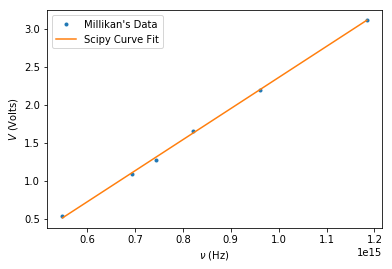

In [28]:
from scipy.optimize import curve_fit

def func(x, a, b):
    return a * x + b

parameters, covariance = curve_fit(func, nu, V)

yfit = func(nu, *parameters) 
# the splat operator unpacks an array into function arguments

plt.plot(nu,V,".",label="Millikan's Data")
plt.plot(nu,yfit,label="Scipy Curve Fit")
plt.legend()

#label it
plt.xlabel(r"$\nu$ (Hz)")
plt.ylabel("$V$ (Volts)")

print(parameters)

Again, we have a fabulous fit.  Since the values calculated by scipy curve fit aren't reported to 16 digits, but rather 8 digits, we can't compare them to our previous values easily.  Look at the uncertainty:

Text(0,0.5,'Percent Diff')

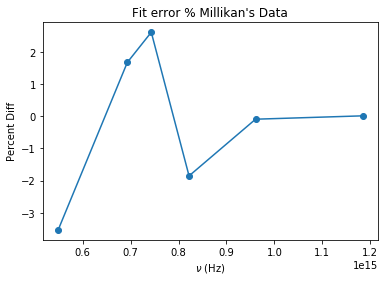

In [31]:
plt.plot(nu,((yfit-V)/V)*100,"o-")
plt.title("Fit error % Millikan's Data")
plt.xlabel(r"$\nu$ (Hz)")
plt.ylabel(r"Percent Diff")

## Plot analysis of Millikan Data/Fit
Here we plot the percent difference between the fit values and the actual voltages as a function of the independent variable (frequency) for Millikan's data.  Here the percent uncertainties vary between $\approx \pm 3%$, and approach $0$ at large values of $\nu$.  Without more data it is difficult to comment on whether this decreased uncertainty is a coincidence, or a result of more precise measurements at higher voltage.

## Part 4: Fitting Projectile Motion Data

1.  Generate some 1D projectile motion data.  You are encouraged to use the function provided in Weekly Session 2. 

2. Add some "noise" to the data with a random variable. Plot the original function (without noise) and the noisy "data" with the scatter() function.  Use some of the tips/tricks on modifying scatter plots that are linked in Weekly Session 2.
3. Note that you have two plots to make - $x$ vs. $t$ and $v$ vs. $t$. Use this [link](https://matplotlib.org/gallery/subplots_axes_and_figures/subplot.html#sphx-glr-gallery-subplots-axes-and-figures-subplot-py) to learn how to make subplots.

4. Perform a curve fit to your noisy "data" and anaylze the error in the fit (i.e. the difference between the fit result and the original (noiseless) function. Compare the fit parameters to your original parameters using the standard deviation in the fit parameters. How close does the fit get to your original parameters? Repeat the analysis to generate new random data and compare again.

### Your solution to Part 4:
-----------------------------------------------------------------------------------------------

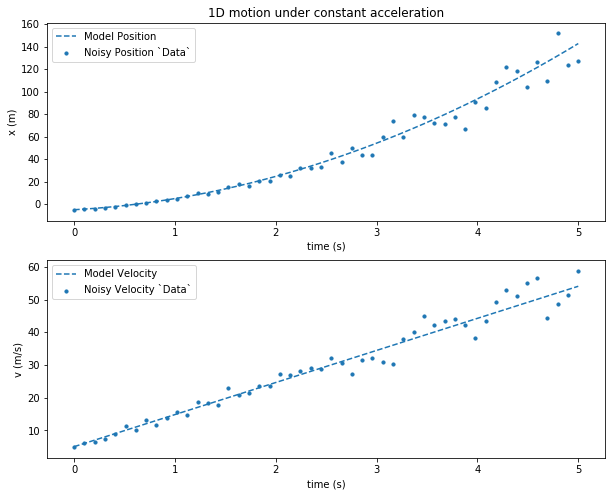

In [24]:
# function to calculate the position and velocity for contant acceleration motion
# inputs: time, acceleration, initial vel, initial pos
# outputs: position, velocity

import random

def position(t, a, v_i=0, x_i=0):
    x=x_i+v_i*t+0.5*a*t**2
    v=v_i+a*t
    return x,v

t = np.linspace(0,5,50)  #seconds

# try your code here
a1=9.81 #m/s^2
t1=0.1  #s
v1=5.0  #m/s
x1=-5.0 #m

x,v = position(t,a1,v_i=v1,x_i=x1)
x_data = x * (1.0 + 0.1*np.random.normal(size=len(x)))
v_data = v * (1.0 + 0.1*np.random.normal(size=len(v)))

plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(t, x, '--',label="Model Position")
plt.scatter(t, x_data, s=10,label="Noisy Position `Data`")
plt.legend()

plt.title('1D motion under constant acceleration')
plt.xlabel('time (s)')
plt.ylabel('x (m)')

plt.subplot(2, 1, 2)
plt.plot(t, v, '--',label="Model Velocity")
plt.scatter(t, v_data, s=10,label="Noisy Velocity `Data`")

plt.xlabel('time (s)')
plt.ylabel('v (m/s)')
plt.legend()

## Plot analysis
Above I plot the generated data for 1D projectile motion - both the exact model (dashed line) and that with randomized noise added.  The randomized data is created by adding a normalized random number with maximum amplitude of 10% of the original value). In the upper panel is plotted $x vs. t$, and in the lower panel is $v vs. t$ for the same object.  We see a typical parabola-like curve for the x-data and a linear curve for the v-data as expected for constant acceleration in 1D.  See fits below.

[ 9.12083904  6.08589362 -5.82279   ]
[ 10.04877533   4.67453333]


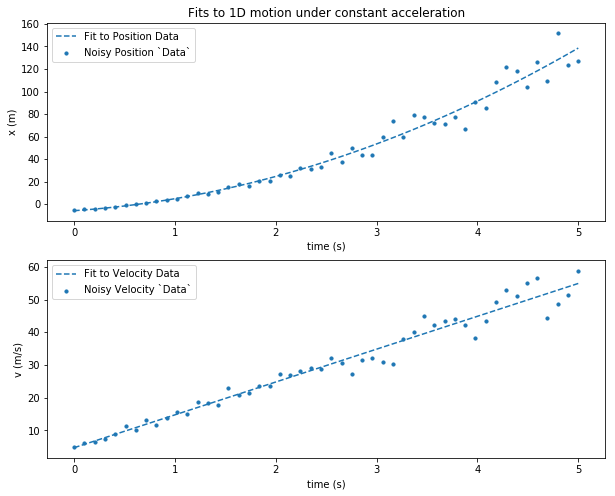

In [25]:
from scipy.optimize import curve_fit

def parabola_func(x, a, b, c):
    return (0.5*a)*x**2 + b*x + c

def linear_func(x, a, b):
    return a*x + b

parameters1, covariance1 = curve_fit(parabola_func, t, x_data)
parameters2, covariance2 = curve_fit(linear_func, t, v_data)

xfit = parabola_func(t, *parameters1) 
vfit = linear_func(t, *parameters2) 
# the splat operator unpacks an array into function arguments

plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(t, xfit, '--',label="Fit to Position Data")
plt.scatter(t, x_data, s=10,label="Noisy Position `Data`")
plt.legend()

plt.title('Fits to 1D motion under constant acceleration')
plt.xlabel('time (s)')
plt.ylabel('x (m)')

plt.subplot(2, 1, 2)
plt.plot(t, vfit, '--',label="Fit to Velocity Data")
plt.scatter(t, v_data, s=10,label="Noisy Velocity `Data`")

plt.xlabel('time (s)')
plt.ylabel('v (m/s)')
plt.legend()

print(parameters1)
print(parameters2)

## Plot analysis
Above I plot the fitted data for 1D projectile motion - both the fit model (dashed line) and model data with randomized noise added (as before). In the upper panel is plotted $x$ vs. $t$, fit with a parabolic curve, and in the lower panel is $v$ vs. $t$, fit with a linear curve, for the same object.  While by eye, this appears to be a very good fit, it appears that the fit is poor near $t$=0s.  I can confirm that by comparing the fit parameters and the original model parameters.  See formatted table below.

In [26]:
print("Parameter.  Model Input.  x - Fit.   %diff(X).  v - Fit.   %diff(V)")
i=0
str_param=["a1","v1","x1"]
for parameter in [a1,v1,x1]:
    per_diff1 = 100*abs(parameter - parameters1[i])/abs(parameter)       
    if i<2:
        per_diff2 = 100*abs(parameter - parameters2[i])/parameter
        print("%8s  %9.2f %12.2f %12.2f %9.2f %10.2f"%(str_param[i], parameter, parameters1[i], per_diff1, parameters2[i], per_diff2))
    else:
        print("%8s  %9.2f %12.2f %12.2f"%(str_param[i], parameter, parameters1[i], per_diff2))
    i+=1
    


Parameter.  Model Input.  x - Fit.   %diff(X).  v - Fit.   %diff(V)
      a1       9.81         9.12         7.03     10.05       2.43
      v1       5.00         6.09        21.72      4.67       6.51
      x1      -5.00        -5.82         6.51


The fit to the x-data is poor since the difference between the model and the fit parameters is 7-20%.  The linear fit is much better, with the difference being 2-7%. Note that this fit was even worse when my time interval ran from 0-10s - this confirmed my hypothesis that the fit is not doing well near t=0s.  To improve it, consider giving the function a more parabolic shape (see below).

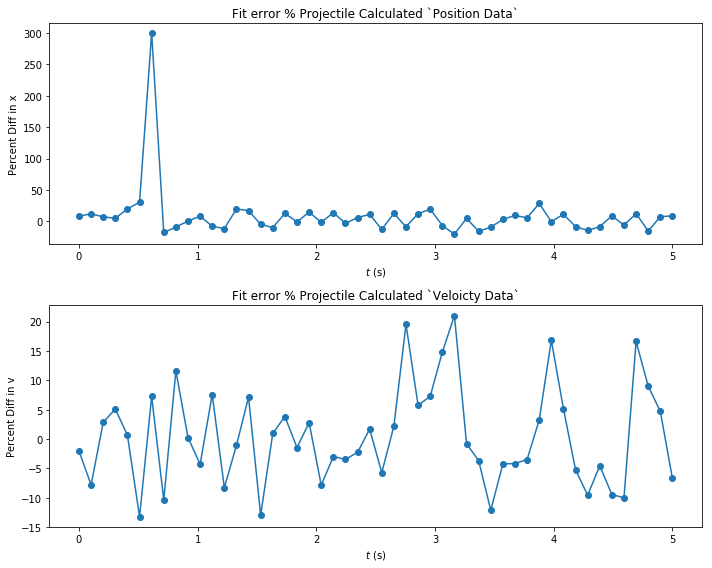

In [27]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(t,((xfit-x_data)/x_data)*100,"o-")
plt.title("Fit error % Projectile Calculated `Position Data`")
plt.xlabel(r"$t$ (s)")
plt.ylabel(r"Percent Diff in x")

plt.subplot(2, 1, 2)
plt.plot(t,((vfit-v_data)/v_data)*100,"o-")
plt.title("Fit error % Projectile Calculated `Veloicty Data`")
plt.xlabel(r"$t$ (s)")
plt.ylabel(r"Percent Diff in v")
plt.tight_layout()

## Plot analysis

Here we plot the percent difference of both fits, with the x-value in the top panel and the v-value in the lower panel.  We see at low $t$ a large uncertainty in the fit of the x-position values that obsures the magnitudes of the remaining percent differences - which we expect to be distributed about zero with about 10-20% uncertainty. This is consistent with our earlier observation that the data is poorly fit near t=0s.  The error in the fit of the velocity data is much better (randomly distributed near 10-20%).  

## Try fitting a more parabolic shape
as if we threw the ball upward before dropping it.

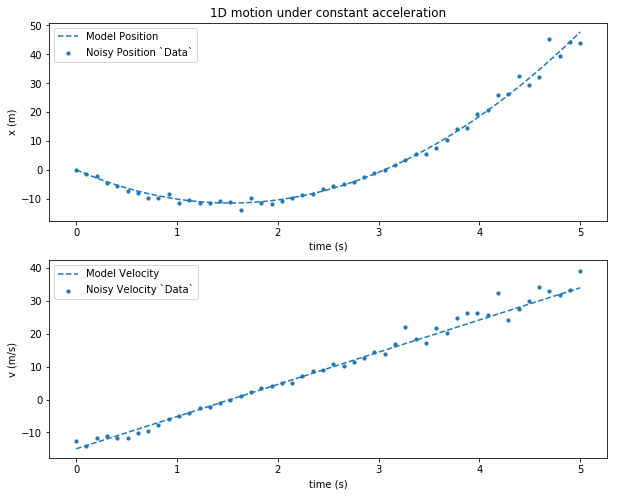

In [31]:
t2 = np.linspace(0,5,50)  #seconds

# try your code here
a1=9.81 #m/s^2
t20=0.0  #s
v10=-15.0  #m/s
x10=0.1 #m

x1,v1 = position(t2,a1,v_i=v10,x_i=x10)
x1_data = x1 * (1.0 + 0.1*np.random.normal(size=len(x1)))
v1_data = v1 * (1.0 + 0.1*np.random.normal(size=len(v1)))

plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(t2, x1, '--',label="Model Position")
plt.scatter(t2, x1_data, s=10,label="Noisy Position `Data`")
plt.legend()

plt.title('1D motion under constant acceleration')
plt.xlabel('time (s)')
plt.ylabel('x (m)')

plt.subplot(2, 1, 2)
plt.plot(t2, v1, '--',label="Model Velocity")
plt.scatter(t2, v1_data, s=10,label="Noisy Velocity `Data`")

plt.xlabel('time (s)')
plt.ylabel('v (m/s)')
plt.legend()

[ 9.12083904  6.08589362 -5.82279   ]
[ 10.04877533   4.67453333]


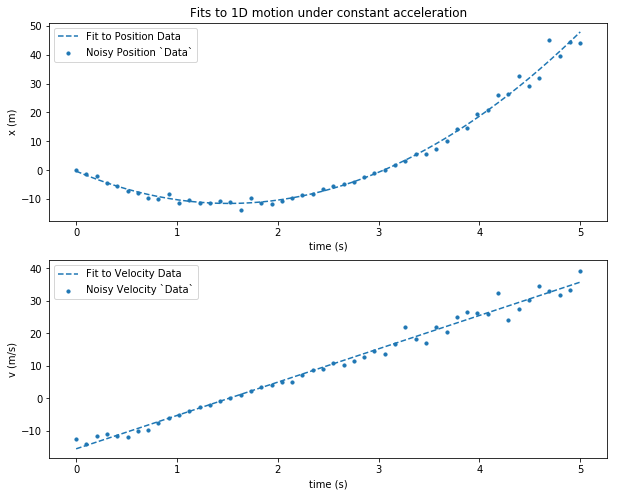

In [33]:
parameters3, covariance3 = curve_fit(parabola_func, t2, x1_data)
parameters4, covariance4 = curve_fit(linear_func, t2, v1_data)

x1fit = parabola_func(t2, *parameters3) 
v1fit = linear_func(t2, *parameters4) 
# the splat operator unpacks an array into function arguments

plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(t2, x1fit, '--',label="Fit to Position Data")
plt.scatter(t2, x1_data, s=10,label="Noisy Position `Data`")
plt.legend()

plt.title('Fits to 1D motion under constant acceleration')
plt.xlabel('time (s)')
plt.ylabel('x (m)')

plt.subplot(2, 1, 2)
plt.plot(t2, v1fit, '--',label="Fit to Velocity Data")
plt.scatter(t2, v1_data, s=10,label="Noisy Velocity `Data`")

plt.xlabel('time (s)')
plt.ylabel('v (m/s)')
plt.legend()

print(parameters1)
print(parameters2)

## Plot analysis

While the plot axes and model remain the same as before for 1d projectile motion, I can already see that the parabolic fit has improved.  Here the fit curve appears to have an even distribution of points above/below the line.  Lets check those numbers:

In [35]:
print("Parameter.  Model Input.  x - Fit.   %diff(X).  v - Fit.   %diff(V)")
i=0
str_param=["a1","v10","x10"]
for parameter in [a1,v10,x10]:
    per_diff1 = 100*abs(parameter - parameters3[i])/abs(parameter)       
    if i<2:
        per_diff2 = 100*abs(parameter - parameters4[i])/parameter
        print("%8s  %9.2f %12.2f %12.2f %9.2f %10.2f"%(str_param[i], parameter, parameters3[i], per_diff1, parameters4[i], per_diff2))
    else:
        print("%8s  %9.2f %12.2f %12.2f"%(str_param[i], parameter, parameters3[i], per_diff2))
    i+=1

Parameter.  Model Input.  x - Fit.   %diff(X).  v - Fit.   %diff(V)
      a1       9.81         9.77         0.42     10.26       4.59
     v10     -15.00       -14.78         1.47    -15.56      -3.73
     x10       0.10        -0.32        -3.73


Indeed, the fit is much better with more curve in the parabola.  Note that softwares such as LoggerPro use algorithms to address these (spline interpretations).

## Post lab questions

Describe briefly Millikan's experiment in your own words.  Be sure to explain these two main points.

1.  What is $\nu$, and why is it the independent variable in the experiment?  Did Millikan use $\nu$ in the           visible, infrared, or ultraviolet spectrum?  Here is a [reference](http://hyperphysics.phy-astr.gsu.edu/hbase/ems3.html) for light energies.
    
2.  What does $V$ measure, and why is it the dependent variable in the experiment?  
-----------------------------------------------------------------------------------------------

*Note I repeat myself from Part 1 - and specifically answer the question about $\nu$*

The plot above shows Millikan's original data from his experiment measuring the Photoelectric effect: he measured the stopping voltage, $V$, of electrons in volts versus the frequency, $\nu$, of incident light measured in Hertz.  Here he controlled the frequency of incident photons ($\nu$ measured in $Hz$) which were incident on a metal blade and measured the kinetic energy, $K$, of the electrons released from the metals.  He related them with Einstein's model for the photoelectric effect:
$$
K = h \nu + P
$$
where $P$ is the energy needed to release an electron from the metal.  Since kinetic energy can be related to stopping voltage by $K = e V$, where $e=1.6 \times 10^{-19}$ Coulombs is the electron's charge and $V$ is the potential difference in the measuring electronic system.  

$$
e V = h \nu + P
$$

Divide through by $e$ and set $\phi=P/e$, defined as the work function of the material.

$$
V = \frac{h}{e} \nu + \phi
$$

We have the expression from Newman.  

Note that the range of $\nu$ values is approxinmately $5.5 \times 10^{14}$ Hz to $1.2 \times 10^{15}$ Hz.  These are very large frequencies, and thus very low wavelengths since they are inversely proportional ($\nu = c/\lambda$).  According to the reference, this is in the Visible and Ultraviolet (UV) range, so Millikan worked with blue light and even lower wavelength, higher frequency, higher energy ($E=hf$) light to produce a photoelectric current.  Since Millikan controlled this frequency, it is of course the independent variable.  The energy of the produced photoelectrons was dependent on this incident light.


## With any remaining time 

* Play with "tricking out" your plots using the matplotlib gallery - which is one of my favorite places on the interwebs. Click on the [link](https://matplotlib.org/gallery/lines_bars_and_markers/scatter_with_legend.html#sphx-glr-gallery-lines-bars-and-markers-scatter-with-legend-py) and use it as a guide to modify your scatter plot.  Once you're done with that, play with the markers as well - you can change their shape! [link](https://matplotlib.org/gallery/lines_bars_and_markers/scatter_symbol.html#sphx-glr-gallery-lines-bars-and-markers-scatter-symbol-py)

* Work on HW6 - which includes finishing all of the exercises in Weekly Session 2